=== Overfitted Model Results ===
Training Accuracy: 1.00
Testing Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1343
           1       0.94      0.95      0.94      1600
           2       0.80      0.81      0.81      1380
           3       0.70      0.72      0.71      1433
           4       0.78      0.79      0.78      1295
           5       0.71      0.68      0.70      1273
           6       0.89      0.90      0.89      1396
           7       0.84      0.82      0.83      1503
           8       0.72      0.73      0.72      1357
           9       0.75      0.76      0.75      1420

    accuracy                           0.80     14000
   macro avg       0.80      0.80      0.80     14000
weighted avg       0.80      0.80      0.80     14000


=== Pruned Model Results ===
Training Accuracy: 0.93
Testing Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.85      

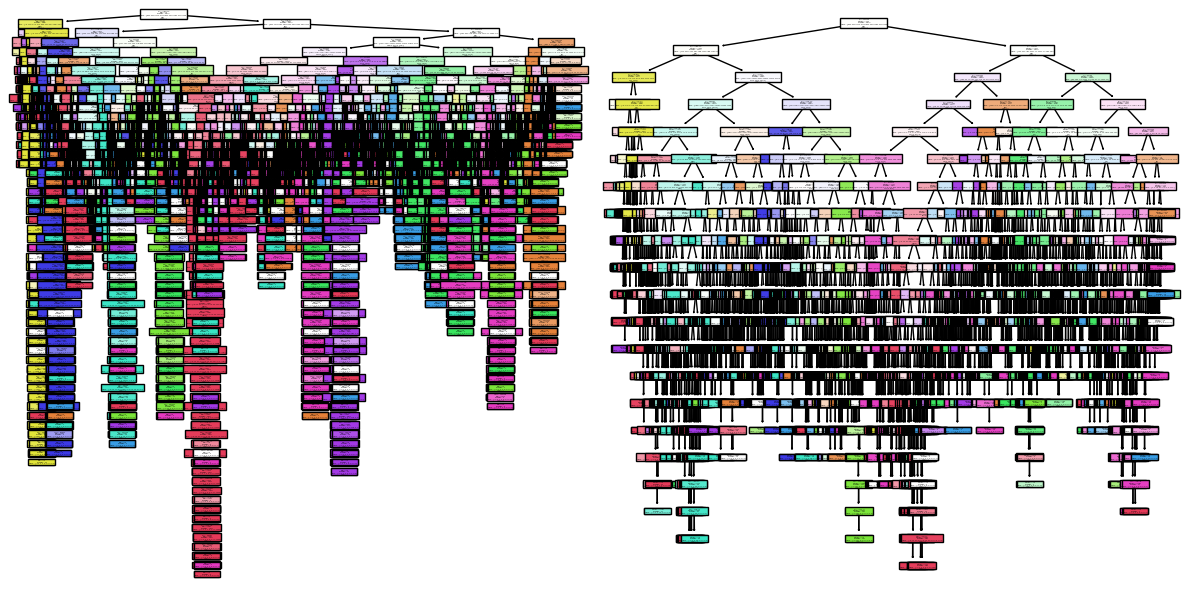

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('sobel_hog_reduced.csv')
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values  # labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create an overfitted decision tree model
overfit_clf = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
overfit_clf.fit(X_train, y_train)

# Make predictions with the overfitted model
y_train_pred_overfit = overfit_clf.predict(X_train)
y_test_pred_overfit = overfit_clf.predict(X_test)

# Evaluate the overfitted model
train_accuracy_overfit = accuracy_score(y_train, y_train_pred_overfit)
test_accuracy_overfit = accuracy_score(y_test, y_test_pred_overfit)

print("=== Overfitted Model Results ===")
print(f"Training Accuracy: {train_accuracy_overfit:.2f}")
print(f"Testing Accuracy: {test_accuracy_overfit:.2f}")
print(classification_report(y_test, y_test_pred_overfit))

# Step 2: Resolve overfitting with pre-pruning
pruned_clf = DecisionTreeClassifier(max_depth=20, criterion='entropy', min_samples_split=20, random_state=42)
pruned_clf.fit(X_train, y_train)

# Make predictions with the pruned model
y_train_pred_pruned = pruned_clf.predict(X_train)
y_test_pred_pruned = pruned_clf.predict(X_test)

# Evaluate the pruned model
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

print("\n=== Pruned Model Results ===")
print(f"Training Accuracy: {train_accuracy_pruned:.2f}")
print(f"Testing Accuracy: {test_accuracy_pruned:.2f}")
print(classification_report(y_test, y_test_pred_pruned))

# Visualize both trees
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Overfitted Decision Tree")
plot_tree(overfit_clf, filled=True, feature_names=[str(i) for i in range(150)], class_names=[str(i) for i in range(10)])

plt.subplot(1, 2, 2)
plt.title("Pruned Decision Tree")
plot_tree(pruned_clf, filled=True, feature_names=[str(i) for i in range(150)], class_names=[str(i) for i in range(10)])

plt.tight_layout()
plt.show()
